In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
original_df = pd.read_csv('../data/311.csv')
original_df.head()

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_8512\1904434483.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('../data/311.csv')


,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101000295613,2011-06-30 21:32:33,2011-07-14 21:32:32,2011-07-01 01:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,Street Lights,...,Greater Mattapan,7,Ward 17,1714,INTERSECTION Groveland St & River St,NaN,42.271544,-71.077221,0101000020E6100000CC4F6F30F1C451C0ADBC83F5C122...,Employee Generated
1,101000295614,2011-06-30 22:18:31,2011-07-04 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,Roslindale,10,Ward 20,2008,39 Lorraine St,2131.0,42.283850,-71.144741,0101000020E6100000C960F36E43C951C06CE46A2F5524...,Self Service
2,101000295615,2011-06-30 22:28:04,2011-08-14 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,Case Closed Case Resolved No Sidewalk and poor...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,West Roxbury,12,Ward 20,2017,INTERSECTION Corey St & Lagrange St,NaN,42.300278,-71.169805,0101000020E6100000B311E014DECA51C0A1102F826F26...,Self Service
3,101000295616,2011-06-30 23:03:48,2011-07-14 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,Case Closed Case Resolved completed,Street Light Outages,Public Works Department,Street Lights,...,Hyde Park,10,Ward 18,1816,235 Fairmount Ave,2136.0,42.249640,-71.115631,0101000020E61000003219CE7E66C751C0DDF2D930F41F...,Self Service
4,101000295617,2011-06-30 23:12:31,NaN,2011-07-01 02:12:38,ONTIME,Closed,Case Closed Case Resolved,Highway Maintenance,Public Works Department,Highway Maintenance,...,Dorchester,7,Ward 13,1309,INTERSECTION Dorchester Ave & Hallam St,NaN,42.314436,-71.056878,0101000020E6100000615079E5A3C351C0C71CEA6D3F28...,Constituent Call


In [3]:
df = pd.read_csv("../../../PBI Script/modified_dates_311.csv")
df.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
0,101000295613,2011-06-30 21:32:33,2011-07-14 21:32:32,2011-07-01 01:06:58,ONTIME,Closed,resolved,Street Light Outages,Public Works Department,Street Lights,...,Employee Generated,0.148900,2011,6,30,21,32,3,181,2
1,101000295614,2011-06-30 22:18:31,2011-07-04 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,Self Service,0.162639,2011,6,30,22,18,3,181,2
2,101000295615,2011-06-30 22:28:04,2011-08-14 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,Self Service,31.537292,2011,6,30,22,28,3,181,2
3,101000295616,2011-06-30 23:03:48,2011-07-14 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Street Light Outages,Public Works Department,Street Lights,...,Self Service,21.548576,2011,6,30,23,3,3,181,2
4,101000295617,2011-06-30 23:12:31,NaN,2011-07-01 02:12:38,ONTIME,Closed,resolved,Highway Maintenance,Public Works Department,Highway Maintenance,...,Constituent Call,0.125081,2011,6,30,23,12,3,181,2


In [4]:
original_df.isnull().sum()

case_enquiry_id                         0
open_dt                                 0
sla_target_dt                      451546
closed_dt                          195432
on_time                               671
case_status                             0
closure_reason                          0
case_title                            544
subject                                 0
reason                                  0
type                                    0
queue                                   0
department                              0
submitted_photo                   2705520
closed_photo                      2459572
location                                0
fire_district                        5591
pwd_district                         1367
city_council_district                 302
police_district                      1087
neighborhood                         2652
neighborhood_services_district        308
ward                                  180
precinct                          

In [5]:
df.isnull().sum()

case_enquiry_id                        0
open_dt                                0
sla_target_dt                     451546
closed_dt                         195432
on_time                              671
case_status                            0
closure_reason                         0
case_title                           544
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
fire_district                       5591
pwd_district                        1367
city_council_district                302
police_district                     1087
neighborhood                           0
neighborhood_services_district       308
ward                                 180
precinct                            1726
location_zipcode                       0
latitude                           44020
longitude                          44020
source          

In [16]:
df.columns

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'fire_district', 'pwd_district',
       'city_council_district', 'police_district', 'neighborhood',
       'neighborhood_services_district', 'ward', 'precinct',
       'location_zipcode', 'latitude', 'longitude', 'source',
       'resolution_time', 'open_year', 'open_month', 'open_day', 'open_hour',
       'open_minute', 'open_dayofweek', 'open_dayofyear', 'open_quarter'],
      dtype='object')

In [82]:
#plot the distribution of null values against years
variable = 'closed_dt'  # Replace 'latitude' with the variable you choose
grouping = 'open_year'

# Counting null values for the chosen variable grouped by 'open_year'
#null_df = df[df[variable]==0].groupby(grouping)[variable]
null_df = df[df[variable].isnull()].groupby(grouping)[variable]
null_counts = null_df.size()

# Print the null counts
print(null_counts)
# Print total null count
print('Total null values: ', null_counts.sum())
# Print original count of grouping
print('Original counts: ', df.groupby(grouping)[variable].size())


open_year
2011     3580
2012     6168
2013     6312
2014    11636
2015    15089
2016    12856
2017    12594
2018    19510
2019    23322
2020    20275
2021    19712
2022    21029
2023    23349
Name: closed_dt, dtype: int64
Total null values:  195432
Original counts:  open_year
2011     58262
2012    118092
2013    142610
2014    147820
2015    210083
2016    216535
2017    251269
2018    262748
2019    259022
2020    251222
2021    273784
2022    276599
2023    240602
Name: closed_dt, dtype: int64


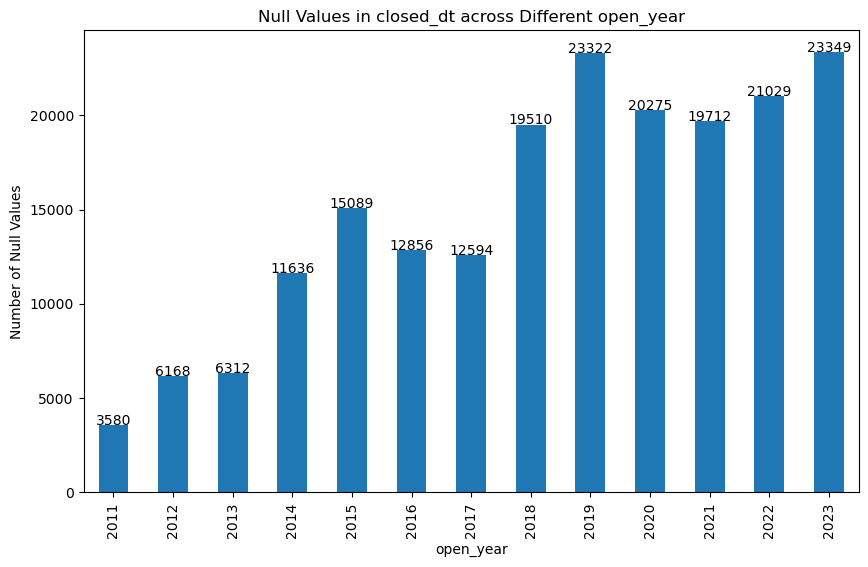

In [83]:
# Plotting
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title(f'Null Values in {variable} across Different {grouping}')
plt.xlabel(f'{grouping}')
plt.ylabel('Number of Null Values')
# Show count of null values on top of each bar
for i, v in enumerate(null_counts):
    plt.text(i, v + 10, str(v), ha='center')
plt.show()

In [53]:
from datetime import datetime, timedelta

# Convert open_dt, closed_dt, and sla_target_dt to datetime
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])
df['sla_target_dt'] = pd.to_datetime(df['sla_target_dt'])

# convert resolution time to timedelta
df['resolution_time'] = df['closed_dt'] - df['open_dt']
df.loc[df['resolution_time'] < timedelta(0),'resolution_time'] = timedelta(seconds=0) # replace negative resolution times with 0
df['resolution_time'] = df['resolution_time'].dt.total_seconds() / 86400

# Get sla_delta
df['sla_delta'] = df['sla_target_dt'] - df['open_dt']
df.loc[df['sla_delta'] < timedelta(0),'sla_delta'] = timedelta(seconds=0) # replace negative sla_deltas with 0
df['sla_delta'] = df['sla_delta'].dt.total_seconds() / 86400

In [ ]:
df['sla_delta'].describe()

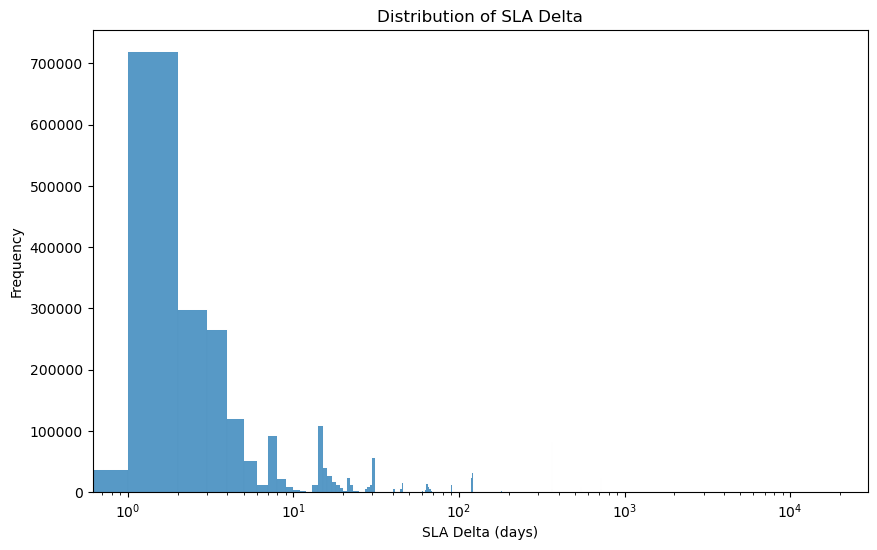

In [57]:
# Sample the data if it's too large
sampled_df = df[df['sla_delta'].notnull()].sample(frac=1)  # Adjust the fraction as necessary
# Use histplot with optimized parameters
plt.figure(figsize=(10, 6))
sns.histplot(sampled_df['sla_delta'], binwidth=1)  # Adjust binwidth as necessary
plt.title('Distribution of SLA Delta')
plt.xlabel('SLA Delta (days)')
plt.ylabel('Frequency')
# log scale on x-axis
plt.xscale('log')
# show count of values on top of each bar
for i, v in enumerate(sampled_df['sla_delta'].value_counts()):
    plt.text(i, v + 10, str(v), ha='center')
plt.show()

In [62]:
# Get log order, if zero, set to 0, and round to floor
sampled_df['log_sla_delta'] = np.log10(df['sla_delta'])
sampled_df.loc[sampled_df['log_sla_delta'] == -np.inf, 'log_sla_delta'] = 0
sampled_df['log_sla_delta'] = sampled_df['log_sla_delta'].apply(np.floor)

c:\Users\kmfoc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    2.257102e+06
mean     3.487636e-01
std      6.696314e-01
min     -5.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.000000e+00
Name: log_sla_delta, dtype: float64

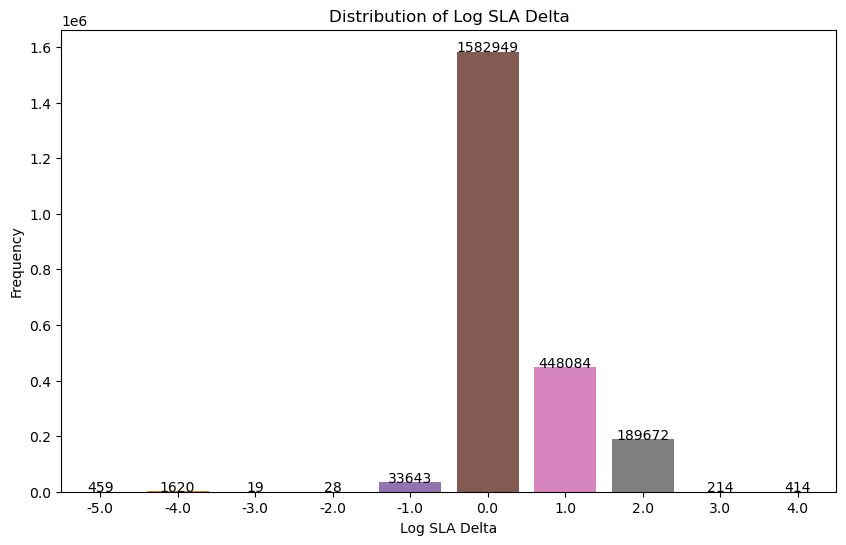

In [69]:
plt.figure(figsize=(10, 6))
# Calculate the value counts and sort by index (which is 'log_sla_delta' here)
value_counts = sampled_df['log_sla_delta'].value_counts().sort_index()
sns.countplot(x='log_sla_delta', data=sampled_df, order=value_counts.index)
plt.title('Distribution of Log SLA Delta')
plt.xlabel('Log SLA Delta')
plt.ylabel('Frequency')

# Annotate the bars with the value counts
for index, value in zip(value_counts.index, value_counts):
    # Find the position of the bar based on the index, which is the x-axis label
    bar_pos = plt.xticks()[0][list(value_counts.index).index(index)]
    plt.text(bar_pos, value + 10, str(value), ha='center')

plt.show()


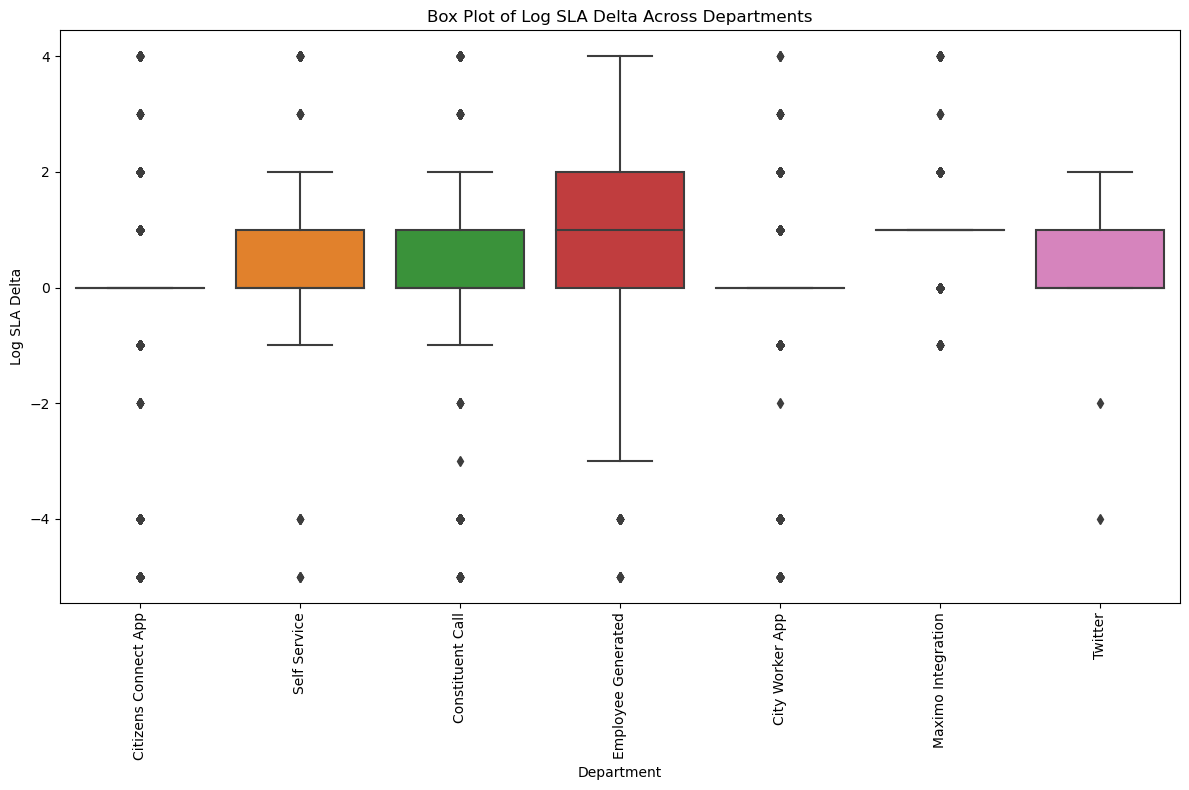

In [75]:
# Assuming 'department' is the column with department names and 'log_sla_delta' is already calculated
plt.figure(figsize=(12, 8))  # You may need to adjust the figure size to fit all departments nicely
sns.boxplot(x='source', y='log_sla_delta', data=sampled_df)
plt.xticks(rotation=90)  # Rotates the department names for better visibility if there are many departments
plt.title('Box Plot of Log SLA Delta Across Departments')
plt.xlabel('Department')
plt.ylabel('Log SLA Delta')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

In [76]:
df.columns

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'fire_district', 'pwd_district',
       'city_council_district', 'police_district', 'neighborhood',
       'neighborhood_services_district', 'ward', 'precinct',
       'location_zipcode', 'latitude', 'longitude', 'source',
       'resolution_time', 'open_year', 'open_month', 'open_day', 'open_hour',
       'open_minute', 'open_dayofweek', 'open_dayofyear', 'open_quarter',
       'sla_delta', 'sla_delta_log_order'],
      dtype='object')

In [77]:
# executive decision to drop the sla_target_dt column
df = df.drop(columns=['sla_target_dt', 'sla_delta', 'sla_delta_log_order'])
df.columns


Index(['case_enquiry_id', 'open_dt', 'closed_dt', 'on_time', 'case_status',
       'closure_reason', 'case_title', 'subject', 'reason', 'type', 'queue',
       'department', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_zipcode', 'latitude', 'longitude',
       'source', 'resolution_time', 'open_year', 'open_month', 'open_day',
       'open_hour', 'open_minute', 'open_dayofweek', 'open_dayofyear',
       'open_quarter'],
      dtype='object')

In [78]:
df.isnull().sum()

case_enquiry_id                        0
open_dt                                0
closed_dt                         195432
on_time                              671
case_status                            0
closure_reason                         0
case_title                           544
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
fire_district                       5591
pwd_district                        1367
city_council_district                302
police_district                     1087
neighborhood                           0
neighborhood_services_district       308
ward                                 180
precinct                            1726
location_zipcode                       0
latitude                           44020
longitude                          44020
source                                 0
resolution_time 

In [129]:
#plot the distribution of null values against years
variable = 'neighborhood_services_district'  # Replace 'latitude' with the variable you choose
grouping = 'neighborhood'

# Counting null values for the chosen variable grouped by 'open_year'
null_df = df[df[variable]==' '].groupby(grouping)[variable]
#null_df = df[df[variable].isnull()].groupby(grouping)[variable]
null_counts = null_df.size()

# Print the null counts
print(null_counts)
# Print total null count
print('Total null values: ', null_counts.sum())

neighborhood
Boston                 1
Brighton               1
Charlestown            2
Dorchester             2
Hyde Park              2
No Neighborhood    54745
Roxbury                1
South Boston           1
Name: neighborhood_services_district, dtype: int64
Total null values:  54755


In [130]:
# head of the variable with null
df[df[variable]==" "].head()

,case_enquiry_id,open_dt,closed_dt,case_status,closure_reason,subject,reason,type,queue,department,city_council_district,neighborhood,neighborhood_services_district,location_zipcode,latitude,longitude,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
127,101000295752,2011-07-01 05:10:34,2011-07-01 08:29:01,Closed,noted,Mayor's 24 Hour Hotline,Employee & General Comments,General Comments For a Program or Policy,INFO_General Comments Complaints Compliments,INFO,,No Neighborhood,,0,NaN,NaN,Constituent Call,0.137813,2011,7,1,5,10,4,182,3
249,101000295886,2011-07-01 07:18:54,2011-07-01 07:22:14,Closed,noted,Mayor's 24 Hour Hotline,Employee & General Comments,General Comments For a Program or Policy,INFO_General Comments Complaints Compliments,INFO,,No Neighborhood,,0,NaN,NaN,Constituent Call,0.002315,2011,7,1,7,18,4,182,3
289,101000295934,2011-07-01 09:05:06,2011-07-25 07:32:41,Closed,resolved,Mayor's 24 Hour Hotline,Employee & General Comments,General Comments For a Program or Policy,BTDT_Permits & Special Events,BTDT,,No Neighborhood,,0,NaN,NaN,Constituent Call,23.935822,2011,7,1,9,5,4,182,3
305,101000295953,2011-07-01 09:53:15,2011-07-27 06:28:40,Closed,novio,Inspectional Services,Environmental Services,Rodent Activity,ISD_Environmental Services (INTERNAL),ISD,,No Neighborhood,,0,NaN,NaN,Constituent Call,25.857928,2011,7,1,9,53,4,182,3
306,101000295954,2011-07-01 09:58:00,2017-05-07 02:40:28,Closed,duplicate,Parks & Recreation Department,Park Maintenance & Safety,Park Maintenance Requests,PARK_Tree in Park,PARK,,No Neighborhood,,0,NaN,NaN,Constituent Call,2136.696157,2011,7,1,9,58,4,182,3


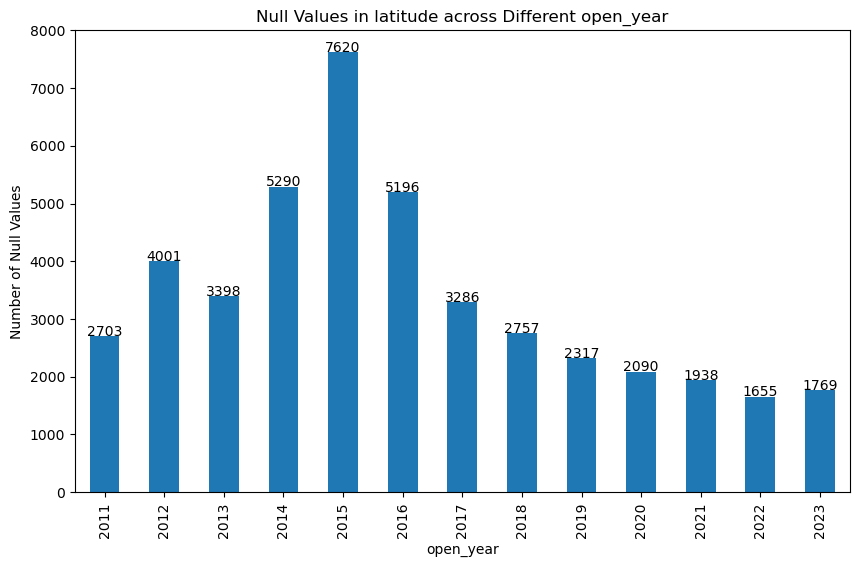

In [122]:
# Plotting
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title(f'Null Values in {variable} across Different {grouping}')
plt.xlabel(f'{grouping}')
plt.ylabel('Number of Null Values')
# Show count of null values on top of each bar
for i, v in enumerate(null_counts):
    plt.text(i, v + 10, str(v), ha='center')
plt.show()

In [103]:
df = df.drop(columns=['case_title'])
df.columns

Index(['case_enquiry_id', 'open_dt', 'closed_dt', 'on_time', 'case_status',
       'closure_reason', 'subject', 'reason', 'type', 'queue', 'department',
       'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_zipcode', 'latitude', 'longitude',
       'source', 'resolution_time', 'open_year', 'open_month', 'open_day',
       'open_hour', 'open_minute', 'open_dayofweek', 'open_dayofyear',
       'open_quarter'],
      dtype='object')

In [106]:
df = df.drop(columns=['on_time'])
df.columns

Index(['case_enquiry_id', 'open_dt', 'closed_dt', 'case_status',
       'closure_reason', 'subject', 'reason', 'type', 'queue', 'department',
       'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_zipcode', 'latitude', 'longitude',
       'source', 'resolution_time', 'open_year', 'open_month', 'open_day',
       'open_hour', 'open_minute', 'open_dayofweek', 'open_dayofyear',
       'open_quarter'],
      dtype='object')

In [116]:
df = df.drop(columns=['fire_district', 'pwd_district', 'police_district', 'ward', 'precinct'])

In [138]:
df.isnull().sum()

case_enquiry_id                        0
open_dt                                0
closed_dt                         195432
case_status                            0
closure_reason                         0
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
city_council_district                  0
neighborhood                           0
neighborhood_services_district         0
location_zipcode                       0
latitude                           44020
longitude                          44020
source                                 0
resolution_time                   195432
open_year                              0
open_month                             0
open_day                               0
open_hour                              0
open_minute                            0
open_dayofweek                         0
open_dayofyear  

In [109]:
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.expand_frame_repr', False)  # Prevents DataFrame from being split across the page
df.head()

,case_enquiry_id,open_dt,closed_dt,case_status,closure_reason,subject,reason,type,queue,department,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_zipcode,latitude,longitude,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,8,07,3,B3,Greater Mattapan,7,Ward 17,1714,2126,42.271544,-71.077221,Employee Generated,0.148900,2011,6,30,21,32,3,181,2
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,12,06,5,E5,Roslindale,10,Ward 20,2008,2131,42.283850,-71.144741,Self Service,0.162639,2011,6,30,22,18,3,181,2
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,BTDT,NaN,06,6,E5,West Roxbury,12,Ward 20,2017,2132,42.300278,-71.169805,Self Service,31.537292,2011,6,30,22,28,3,181,2
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,12,08,5,E18,Hyde Park,10,Ward 18,1816,2136,42.249640,-71.115631,Self Service,21.548576,2011,6,30,23,3,3,181,2
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,7,03,3,C11,Dorchester,7,Ward 13,1309,2125,42.314436,-71.056878,Constituent Call,0.125081,2011,6,30,23,12,3,181,2


In [137]:
df['city_council_district'].value_counts()


2     474250
1     381005
7     300999
6     281029
3     261594
5     246194
8     242401
4     234577
9     228357
-1     55057
0       3185
Name: city_council_district, dtype: int64

In [135]:
# update neighborhood_services_district, and city_council_district such that Nan and " " are replaced with -1
df['neighborhood_services_district'] = df['neighborhood_services_district'].replace(" ", -1)
df['city_council_district'] = df['city_council_district'].replace(" ", -1)
# fill na with -1
df['neighborhood_services_district'] = df['neighborhood_services_district'].fillna(-1)
df['city_council_district'] = df['city_council_district'].fillna(-1)

In [140]:
df.shape

(2708648, 26)

In [139]:
# Save the cleaned data to a new csv file
df.to_csv('../data/cleaned_311.csv', index=False)